In [1]:
import pandas as pd
import numpy as np


DATA_PATH = "./data/Polymer Tg SMILES.xlsx"

data = pd.read_excel(DATA_PATH)
data

,No,Polymer ID,Nama Polimer,SMILES,Tg
0,1,P010001,polyethylene,*C*,-120
1,2,P010002,polypropylene,*CC(C)*,0
2,3,P010003,polybutene,*CC(CC)*,-24
3,4,P010004,poly(pent-1-ene),CCCC(C*)*,-40
4,5,P010008,poly(4-methylpent-1-ene),*CC(CC(C)C)*,30
...,...,...,...,...,...
1435,1436,P522008,"poly(2,2,3,3,4,4,4-heptafluorobutyl 2-fluoroac...",*CC(C(=O)OCC(C(C(F)(F)F)(F)F)(F)F)(F)*,75
1436,1437,P522009,"poly(2,2,3,3,4,4,5,5,5-nonafluoropentyl 2-fluo...",*CC(C(=O)OCC(C(C(C(F)(F)F)(F)F)(F)F)(F)F)(F)*,63
1437,1438,P522016,"poly(3,3,4,4,5,5,6,6,6-nonafluorohexyl 2-fluor...",*CC(C(=O)OCCC(C(C(C(F)(F)F)(F)F)(F)F)(F)F)(F)*,6
1438,1439,P522017,"poly(3,3,4,4,5,5,6,6,7,7,8,8,8-tridecafluorooc...",*CC(C(=O)OCCC(C(C(C(C(C(F)(F)F)(F)F)(F)F)(F)F)...,53


In [2]:
data[data["Tg"] == "9,000,00"]

,No,Polymer ID,Nama Polimer,SMILES,Tg
537,538,P110078,"poly{(hexane-1,6-diol)-alt-[1,4-phenylenebis(m...",*CCCCCCOC(=O)NCc1ccc(cc1)CNC(=O)O*,"9,000,00"


In [3]:
data = data[data["Tg"] != "9,000,00"].copy()
data.reset_index(drop=True, inplace=True)

In [4]:
data["Tg"] = data["Tg"].astype(float)
data["Tg"].describe()

count    1433.00000
mean       85.59187
std        88.82163
min      -139.00000
25%        35.00000
50%        75.00000
75%       130.00000
max       420.00000
Name: Tg, dtype: float64

In [5]:
data["SMILES"].apply(lambda x: len(x)).describe()

count    1439.000000
mean       48.234190
std        27.807956
min         3.000000
25%        28.000000
50%        43.000000
75%        64.000000
max       170.000000
Name: SMILES, dtype: float64

In [6]:
data

,No,Polymer ID,Nama Polimer,SMILES,Tg
0,1,P010001,polyethylene,*C*,-120.0
1,2,P010002,polypropylene,*CC(C)*,0.0
2,3,P010003,polybutene,*CC(CC)*,-24.0
3,4,P010004,poly(pent-1-ene),CCCC(C*)*,-40.0
4,5,P010008,poly(4-methylpent-1-ene),*CC(CC(C)C)*,30.0
...,...,...,...,...,...
1434,1436,P522008,"poly(2,2,3,3,4,4,4-heptafluorobutyl 2-fluoroac...",*CC(C(=O)OCC(C(C(F)(F)F)(F)F)(F)F)(F)*,75.0
1435,1437,P522009,"poly(2,2,3,3,4,4,5,5,5-nonafluoropentyl 2-fluo...",*CC(C(=O)OCC(C(C(C(F)(F)F)(F)F)(F)F)(F)F)(F)*,63.0
1436,1438,P522016,"poly(3,3,4,4,5,5,6,6,6-nonafluorohexyl 2-fluor...",*CC(C(=O)OCCC(C(C(C(F)(F)F)(F)F)(F)F)(F)F)(F)*,6.0
1437,1439,P522017,"poly(3,3,4,4,5,5,6,6,7,7,8,8,8-tridecafluorooc...",*CC(C(=O)OCCC(C(C(C(C(C(F)(F)F)(F)F)(F)F)(F)F)...,53.0


In [7]:
from rdkit import Chem
from rdkit.Chem import AllChem
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import pandas as pd

In [8]:
from rdkit import Chem
from rdkit.Chem import AllChem
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import pandas as pd


def encode_smiles(smiles_string):

    bitsize = 200

    mol = Chem.MolFromSmiles(smiles_string)
    if mol is None:
        print("Invalid SMILES string.")
        return np.zeros(bitsize)

    fingerprint = AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=bitsize)
    fingerprint_array = np.array(fingerprint).reshape(-1, 1)

    encoder = OneHotEncoder(sparse_output=False)
    encoded_fingerprint = encoder.fit_transform(fingerprint_array)

    return pd.DataFrame(encoded_fingerprint).T.iloc[1].values

In [9]:
# from rdkit import Chem
# from rdkit.Chem import rdFingerprintGenerator
# import numpy as np


# def smiles_to_fingerprint(smiles, fp_size=2048):
#     """
#     Convert a SMILES string to a binary molecular fingerprint.

#     Args:
#         smiles (str): SMILES representation of the molecule.
#         fp_size (int): Size of the fingerprint vector.

#     Returns:
#         np.array: Binary fingerprint vector or None if invalid SMILES.
#     """
#     mol = Chem.MolFromSmiles(smiles)
#     if mol is None:
#         return None  # Invalid SMILES string

#     # Generate Morgan fingerprint (ECFP) as binary vector
#     fp_gen = rdFingerprintGenerator.GetMorganGenerator(radius=2, fpSize=fp_size)
#     fp = fp_gen.GetFingerprint(mol)

#     return np.array(fp.ToBitString(), dtype=int)


# # Example SMILES
# smiles_str = "CC(C(=O)OCC(C(C(F)(F)F)(F)F)(F)F)(F)"

# # Apply conversion
# fingerprint = smiles_to_fingerprint(smiles_str)

# if fingerprint is not None:
#     print("Fingerprint vector:", fingerprint)
#     print("Vector size:", len(fingerprint))
# else:
#     print("Invalid SMILES representation")

In [9]:
smiles_string = "*CC(C(=O)OCC(C(C(F)(F)F)(F)F)(F)F)(F)*"
df = encode_smiles(smiles_string)
df

[02:20:31] DEPRECATION WARNING: please use MorganGenerator


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.])

In [10]:
features = []
for smiles in data["SMILES"]:
    features.append(encode_smiles(smiles))

[02:20:34] DEPRECATION WARNING: please use MorganGenerator
[02:20:34] DEPRECATION WARNING: please use MorganGenerator
[02:20:34] DEPRECATION WARNING: please use MorganGenerator
[02:20:34] DEPRECATION WARNING: please use MorganGenerator
[02:20:34] DEPRECATION WARNING: please use MorganGenerator
[02:20:34] DEPRECATION WARNING: please use MorganGenerator
[02:20:34] DEPRECATION WARNING: please use MorganGenerator
[02:20:34] DEPRECATION WARNING: please use MorganGenerator
[02:20:34] DEPRECATION WARNING: please use MorganGenerator
[02:20:34] DEPRECATION WARNING: please use MorganGenerator
[02:20:34] DEPRECATION WARNING: please use MorganGenerator
[02:20:34] DEPRECATION WARNING: please use MorganGenerator
[02:20:34] DEPRECATION WARNING: please use MorganGenerator
[02:20:34] DEPRECATION WARNING: please use MorganGenerator
[02:20:34] DEPRECATION WARNING: please use MorganGenerator
[02:20:34] DEPRECATION WARNING: please use MorganGenerator
[02:20:34] DEPRECATION WARNING: please use MorganGenerat

Invalid SMILES string.
Invalid SMILES string.


[02:20:34] Explicit valence for atom # 0 B, 5, is greater than permitted
[02:20:34] DEPRECATION WARNING: please use MorganGenerator
[02:20:34] DEPRECATION WARNING: please use MorganGenerator
[02:20:34] DEPRECATION WARNING: please use MorganGenerator
[02:20:34] DEPRECATION WARNING: please use MorganGenerator
[02:20:34] DEPRECATION WARNING: please use MorganGenerator
[02:20:34] DEPRECATION WARNING: please use MorganGenerator
[02:20:34] DEPRECATION WARNING: please use MorganGenerator
[02:20:34] DEPRECATION WARNING: please use MorganGenerator
[02:20:34] DEPRECATION WARNING: please use MorganGenerator
[02:20:34] DEPRECATION WARNING: please use MorganGenerator
[02:20:34] DEPRECATION WARNING: please use MorganGenerator
[02:20:34] DEPRECATION WARNING: please use MorganGenerator
[02:20:34] DEPRECATION WARNING: please use MorganGenerator
[02:20:34] DEPRECATION WARNING: please use MorganGenerator
[02:20:34] DEPRECATION WARNING: please use MorganGenerator
[02:20:34] DEPRECATION WARNING: please use

Invalid SMILES string.


[02:20:37] DEPRECATION WARNING: please use MorganGenerator
[02:20:37] DEPRECATION WARNING: please use MorganGenerator
[02:20:37] DEPRECATION WARNING: please use MorganGenerator
[02:20:37] DEPRECATION WARNING: please use MorganGenerator
[02:20:37] DEPRECATION WARNING: please use MorganGenerator
[02:20:37] DEPRECATION WARNING: please use MorganGenerator
[02:20:37] DEPRECATION WARNING: please use MorganGenerator
[02:20:37] DEPRECATION WARNING: please use MorganGenerator
[02:20:37] DEPRECATION WARNING: please use MorganGenerator
[02:20:37] DEPRECATION WARNING: please use MorganGenerator
[02:20:37] DEPRECATION WARNING: please use MorganGenerator
[02:20:37] DEPRECATION WARNING: please use MorganGenerator
[02:20:37] DEPRECATION WARNING: please use MorganGenerator
[02:20:37] DEPRECATION WARNING: please use MorganGenerator
[02:20:37] DEPRECATION WARNING: please use MorganGenerator
[02:20:37] DEPRECATION WARNING: please use MorganGenerator
[02:20:37] DEPRECATION WARNING: please use MorganGenerat

In [11]:
features = pd.DataFrame(features)
features.columns = [f"F{col}" for col in features.columns]
features

,F0,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F190,F191,F192,F193,F194,F195,F196,F197,F198,F199
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1434,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1435,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1436,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1437,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
data

,No,Polymer ID,Nama Polimer,SMILES,Tg
0,1,P010001,polyethylene,*C*,-120.0
1,2,P010002,polypropylene,*CC(C)*,0.0
2,3,P010003,polybutene,*CC(CC)*,-24.0
3,4,P010004,poly(pent-1-ene),CCCC(C*)*,-40.0
4,5,P010008,poly(4-methylpent-1-ene),*CC(CC(C)C)*,30.0
...,...,...,...,...,...
1434,1436,P522008,"poly(2,2,3,3,4,4,4-heptafluorobutyl 2-fluoroac...",*CC(C(=O)OCC(C(C(F)(F)F)(F)F)(F)F)(F)*,75.0
1435,1437,P522009,"poly(2,2,3,3,4,4,5,5,5-nonafluoropentyl 2-fluo...",*CC(C(=O)OCC(C(C(C(F)(F)F)(F)F)(F)F)(F)F)(F)*,63.0
1436,1438,P522016,"poly(3,3,4,4,5,5,6,6,6-nonafluorohexyl 2-fluor...",*CC(C(=O)OCCC(C(C(C(F)(F)F)(F)F)(F)F)(F)F)(F)*,6.0
1437,1439,P522017,"poly(3,3,4,4,5,5,6,6,7,7,8,8,8-tridecafluorooc...",*CC(C(=O)OCCC(C(C(C(C(C(F)(F)F)(F)F)(F)F)(F)F)...,53.0


In [13]:
processed_data = pd.concat([data, features], axis=1)
processed_data

,No,Polymer ID,Nama Polimer,SMILES,Tg,F0,F1,F2,F3,F4,...,F190,F191,F192,F193,F194,F195,F196,F197,F198,F199
0,1,P010001,polyethylene,*C*,-120.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,P010002,polypropylene,*CC(C)*,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,P010003,polybutene,*CC(CC)*,-24.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,P010004,poly(pent-1-ene),CCCC(C*)*,-40.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,P010008,poly(4-methylpent-1-ene),*CC(CC(C)C)*,30.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1434,1436,P522008,"poly(2,2,3,3,4,4,4-heptafluorobutyl 2-fluoroac...",*CC(C(=O)OCC(C(C(F)(F)F)(F)F)(F)F)(F)*,75.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1435,1437,P522009,"poly(2,2,3,3,4,4,5,5,5-nonafluoropentyl 2-fluo...",*CC(C(=O)OCC(C(C(C(F)(F)F)(F)F)(F)F)(F)F)(F)*,63.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1436,1438,P522016,"poly(3,3,4,4,5,5,6,6,6-nonafluorohexyl 2-fluor...",*CC(C(=O)OCCC(C(C(C(F)(F)F)(F)F)(F)F)(F)F)(F)*,6.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1437,1439,P522017,"poly(3,3,4,4,5,5,6,6,7,7,8,8,8-tridecafluorooc...",*CC(C(=O)OCCC(C(C(C(C(C(F)(F)F)(F)F)(F)F)(F)F)...,53.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
processed_data = processed_data.dropna(subset=["Tg"])
processed_data.reset_index(drop=True, inplace=True)
processed_data

,No,Polymer ID,Nama Polimer,SMILES,Tg,F0,F1,F2,F3,F4,...,F190,F191,F192,F193,F194,F195,F196,F197,F198,F199
0,1,P010001,polyethylene,*C*,-120.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,P010002,polypropylene,*CC(C)*,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,P010003,polybutene,*CC(CC)*,-24.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,P010004,poly(pent-1-ene),CCCC(C*)*,-40.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,P010008,poly(4-methylpent-1-ene),*CC(CC(C)C)*,30.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1428,1436,P522008,"poly(2,2,3,3,4,4,4-heptafluorobutyl 2-fluoroac...",*CC(C(=O)OCC(C(C(F)(F)F)(F)F)(F)F)(F)*,75.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1429,1437,P522009,"poly(2,2,3,3,4,4,5,5,5-nonafluoropentyl 2-fluo...",*CC(C(=O)OCC(C(C(C(F)(F)F)(F)F)(F)F)(F)F)(F)*,63.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1430,1438,P522016,"poly(3,3,4,4,5,5,6,6,6-nonafluorohexyl 2-fluor...",*CC(C(=O)OCCC(C(C(C(F)(F)F)(F)F)(F)F)(F)F)(F)*,6.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1431,1439,P522017,"poly(3,3,4,4,5,5,6,6,7,7,8,8,8-tridecafluorooc...",*CC(C(=O)OCCC(C(C(C(C(C(F)(F)F)(F)F)(F)F)(F)F)...,53.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
processed_data.iloc[:, 5:].sum(axis=1)

0        3.0
1       10.0
2       13.0
3       15.0
4       15.0
        ... 
1428    26.0
1429    28.0
1430    29.0
1431    30.0
1432    30.0
Length: 1433, dtype: float64

In [16]:
processed_data["SMILES"].apply(lambda x: len(x))

0        3
1        7
2        8
3        9
4       12
        ..
1428    38
1429    45
1430    46
1431    60
1432    60
Name: SMILES, Length: 1433, dtype: int64

In [17]:
# number of SMILES characters | Character length = min 3 max 170

In [18]:
import matplotlib.pyplot as plt

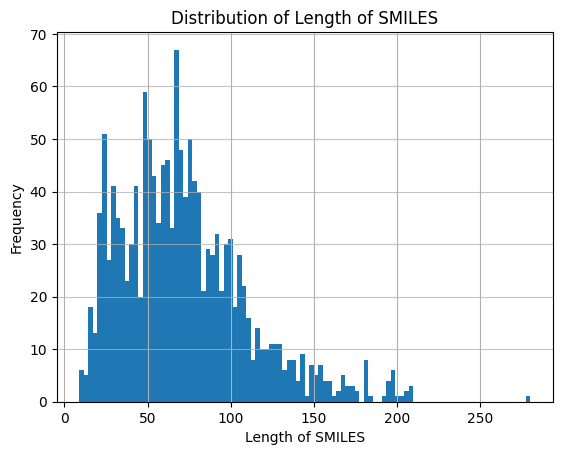

In [19]:
polimer_name_length = processed_data["Nama Polimer"].apply(lambda x: len(x))


polimer_name_length.hist(bins=100)
plt.xlabel('Length of SMILES')
plt.ylabel('Frequency')
plt.title('Distribution of Length of SMILES')
plt.grid(axis='y', alpha=0.75)
plt.show()

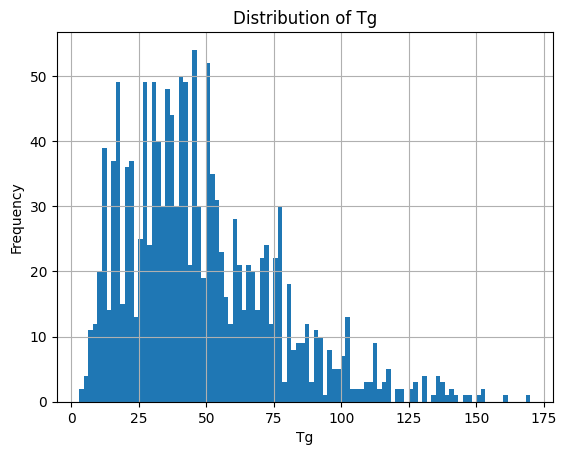

In [20]:
smiles_length = processed_data["SMILES"].apply(lambda x: len(x))



smiles_length.hist(bins=100)
plt.xlabel('Tg')
plt.ylabel('Frequency')
plt.title('Distribution of Tg')
plt.show()

In [21]:
X = processed_data.drop(columns=["No", "Polymer ID", "Nama Polimer", "SMILES", "Tg"])
X

,F0,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F190,F191,F192,F193,F194,F195,F196,F197,F198,F199
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1428,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1429,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1430,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1431,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
y = processed_data["Tg"]
y

0      -120.0
1         0.0
2       -24.0
3       -40.0
4        30.0
        ...  
1428     75.0
1429     63.0
1430      6.0
1431     53.0
1432     53.0
Name: Tg, Length: 1433, dtype: float64

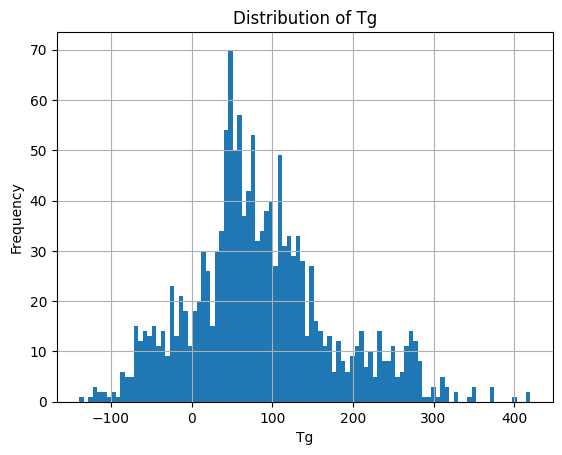

In [23]:
import matplotlib.pyplot as plt

y.hist(bins=100)
plt.xlabel('Tg')
plt.ylabel('Frequency')
plt.title('Distribution of Tg')
plt.show()

In [25]:
# from sklearn.model_selection import train_test_split


# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, random_state=42
# )

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyRegressor

# Load your dataset (replace with actual data loading)
# df = pd.read_csv("your_data.csv")  # Example
# Assuming the last column is the target variable

# Generating a random dataset for demonstration
np.random.seed(42)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize LazyRegressor
reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)

# Fit and evaluate models
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

100%|██████████| 42/42 [00:23<00:00,  1.79it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001525 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 591
[LightGBM] [Info] Number of data points in the train set: 1146, number of used features: 197
[LightGBM] [Info] Start training from score 84.362958


In [21]:
models.sort_values(by="R-Squared", ascending=False)

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
GradientBoostingRegressor,-0.98,0.40,67.20,0.61
BayesianRidge,-1.07,0.38,68.73,0.14
ElasticNetCV,-1.08,0.38,68.83,0.35
RandomForestRegressor,-1.08,0.37,68.89,2.10
ElasticNet,-1.08,0.37,68.96,0.03
LGBMRegressor,-1.10,0.37,69.26,0.29
TweedieRegressor,-1.11,0.37,69.35,0.05
LassoLarsIC,-1.11,0.37,69.39,0.16
LassoCV,-1.11,0.36,69.43,0.45


In [24]:
import numpy as np
import pandas as pd
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, cross_val_score

# Assuming you already have X and y
# X = ...  # Features (NumPy array or Pandas DataFrame, binary values)
# y = ...  # Target (NumPy array or Pandas Series)

# Define SVR model (without StandardScaler)
svr = SVR()

# Define hyperparameter grid
param_grid = {
    "C": [1],  # Regularization parameter
    # "epsilon": [0.01, 0.1, 1],  # Epsilon-tube width
    "gamma": ["scale", "auto", 0.01],  # Kernel coefficient
    "kernel": ["rbf"],  # Kernel type
}

# Set up GridSearchCV with 10-fold cross-validation
grid_search = GridSearchCV(svr, param_grid, cv=10, scoring="r2", n_jobs=-1, verbose=1)

# Fit the model
grid_search.fit(X, y)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

Fitting 10 folds for each of 3 candidates, totalling 30 fits


In [25]:
# Print results
print(f"Best Parameters: {best_params}")
print(f"Best R^2 Score: {best_score:.4f}")

# Get cross-validated R^2 scores for the best model
cv_scores = cross_val_score(grid_search.best_estimator_, X, y, cv=10, scoring="r2")

# Convert to DataFrame for better visualization
cv_results_df = pd.DataFrame({"Fold": np.arange(1, 11), "R^2 Score": cv_scores})

print("\nCross-Validation R^2 Scores:")
cv_results_df

Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best R^2 Score: 0.0495

Cross-Validation R^2 Scores:


,Fold,R^2 Score
0,1,-0.12
1,2,0.14
2,3,0.07
3,4,-0.06
4,5,0.04
5,6,0.07
6,7,0.08
7,8,0.20
8,9,0.11
9,10,-0.02


In [26]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score

# Assuming you already have X and y
# X = ...  # Features (NumPy array or Pandas DataFrame, binary values)
# y = ...  # Target (NumPy array or Pandas Series)

# Define KNN regressor
knn = KNeighborsRegressor()

# Define hyperparameter grid
param_grid = {
    "n_neighbors": [5, 8, 10],  # Number of neighbors
    "weights": ["uniform", "distance"],  # Weighting scheme
    "p": [1, 2],  # Minkowski distance parameter (1 = Manhattan, 2 = Euclidean)
}

# Set up GridSearchCV with 10-fold cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=10, scoring="r2", n_jobs=-1, verbose=1)

# Fit the model
grid_search.fit(X, y)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print results
print(f"Best Parameters: {best_params}")
print(f"Best R^2 Score: {best_score:.4f}")

# Get cross-validated R^2 scores for the best model
cv_scores = cross_val_score(grid_search.best_estimator_, X, y, cv=10, scoring="r2")

# Convert to DataFrame for better visualization
cv_results_df = pd.DataFrame({"Fold": np.arange(1, 11), "R^2 Score": cv_scores})

print("\nCross-Validation R^2 Scores:")
cv_results_df

Fitting 10 folds for each of 12 candidates, totalling 120 fits
Best Parameters: {'n_neighbors': 10, 'p': 1, 'weights': 'uniform'}
Best R^2 Score: 0.0937

Cross-Validation R^2 Scores:


,Fold,R^2 Score
0,1,-0.075196
1,2,0.071462
2,3,-0.029140
3,4,-0.092636
4,5,-0.007391
5,6,0.079409
6,7,0.163305
7,8,0.317182
8,9,0.376120
9,10,0.134006


In [27]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score

# Assuming you already have X and y
# X = ...  # Features (NumPy array or Pandas DataFrame, binary values)
# y = ...  # Target (NumPy array or Pandas Series)

# Define Random Forest regressor
rf = RandomForestRegressor()

# Define hyperparameter grid
param_grid = {
    "n_estimators": [100, 200, 300],  # Number of trees
    "max_depth": [None, 5, 10],  # Maximum depth of the tree
    "min_samples_split": [2, 5],  # Minimum samples required to split a node
    "min_samples_leaf": [1, 2],  # Minimum samples required at each leaf node
}

# Set up GridSearchCV with 10-fold cross-validation
grid_search = GridSearchCV(rf, param_grid, cv=10, scoring="r2", n_jobs=-1, verbose=1)

# Fit the model
grid_search.fit(X, y)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print results
print(f"Best Parameters: {best_params}")
print(f"Best R^2 Score: {best_score:.4f}")

# Get cross-validated R^2 scores for the best model
cv_scores = cross_val_score(grid_search.best_estimator_, X, y, cv=10, scoring="r2")

# Convert to DataFrame for better visualization
cv_results_df = pd.DataFrame({"Fold": np.arange(1, 11), "R^2 Score": cv_scores})

print("\nCross-Validation R^2 Scores:")
cv_results_df

Fitting 10 folds for each of 36 candidates, totalling 360 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Best R^2 Score: 0.2215

Cross-Validation R^2 Scores:


,Fold,R^2 Score
0,1,0.174405
1,2,0.130132
2,3,0.057575
3,4,0.073468
4,5,0.064071
5,6,0.372227
6,7,0.113053
7,8,0.404265
8,9,0.400842
9,10,0.295266
